# Example 1: Creating a Synthetic Dataset
In this notebook we show you how to create a simple synthetic dataset.

# Environment

## Library Imports

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

## Jupyter-specific Imports and Settings

In [2]:
# set printing options
np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    get_ipython().run_line_magic('load_ext', 'autoreload')

get_ipython().run_line_magic('autoreload', '2')
from importlib import reload

## Library Imports
For this example we will use the MarginalSynthesizer algorithm. As the name suggest this algorithm generates data based on the marginal distributions of each column that exists in the input dataset. In other words. the output synthetic data will have similar counts for each feature, but the relations between features are likely not preserved. Hence, this approach is rather naive as most statistical patterns are not captured. However, it will work with datasets of any shape or size - and run relatively quickly as well. 

In [3]:
from synthesis.hist_synthesis import MarginalSynthesizer

# Synthetic Data Generation
Let's load a dataset to see how the generation process works.

In this case, we will use the adult dataset - source: https://archive.ics.uci.edu/ml/datasets/adult

In [4]:
df = pd.read_csv('../data/input/adult.csv', delimiter=', ', engine='python').astype(str)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


We will now import our synthesizer and fit it on the input data. 

Additionally we can specify the 'epsilon' value, which according to the definition of differential privacy is used to quantify the privacy risk posed by releasing statistics computed on sensitive data. More on that here: https://www.cis.upenn.edu/~aaroth/Papers/privacybook.pdf

In short, a lower value of epsilon will result in more randomness and v.v.

In [5]:
epsilon = 0.1

ms = MarginalSynthesizer(epsilon=0.1)
ms.fit(df)

Column fitted: age
Column fitted: workclass
Column fitted: fnlwgt
Column fitted: education
Column fitted: education-num
Column fitted: marital-status
Column fitted: occupation
Column fitted: relationship
Column fitted: race
Column fitted: sex
Column fitted: capital-gain
Column fitted: capital-loss
Column fitted: hours-per-week
Column fitted: native-country
Column fitted: income


MarginalSynthesizer(epsilon=0.1)

After our synthesizer has fitted the structure of the original data source, we can now use it to generate a new dataset.

In [6]:
df_synth = ms.transform(df)

Column sampled: age
Column sampled: workclass
Column sampled: fnlwgt
Column sampled: education
Column sampled: education-num
Column sampled: marital-status
Column sampled: occupation
Column sampled: relationship
Column sampled: race
Column sampled: sex
Column sampled: capital-gain
Column sampled: capital-loss
Column sampled: hours-per-week
Column sampled: native-country
Column sampled: income


We now obtained a new dataset which looks very similar to the original one.

In [7]:
df_synth.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,26,Private,113176,Some-college,15,Never-married,Sales,Not-in-family,White,Male,0,0,17,Nicaragua,<=50K
1,22,?,49595,Some-college,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K
2,37,Self-emp-not-inc,227489,12th,10,Never-married,Machine-op-inspct,Unmarried,White,Male,1111,2824,60,United-States,<=50K
3,36,Private,124959,HS-grad,16,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,50,France,<=50K
4,40,Private,233955,Some-college,12,Married-civ-spouse,Prof-specialty,Not-in-family,White,Male,9386,1902,40,Yugoslavia,<=50K


# Utlity Evaluation
NOTE: this section will be extended in the near future.

In order to evaluate the output we can examine the feature distances for each attribute, i.e. we compares the value counts for each column in the original with the synthetic dataset.

In [8]:
from synthesis.evaluation import visual

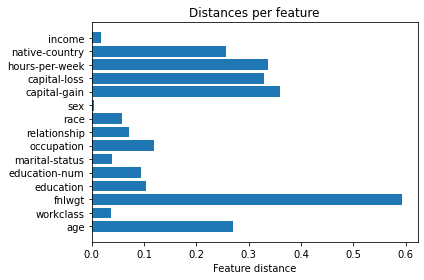

In [9]:
visual.plot_feature_distances(df, df_synth)

Just to make sure, let's generate data with a much higher level of epsilon and see whether we get improved utility. 

In [11]:
epsilon_100 = 100
ms_100 = MarginalSynthesizer(epsilon=epsilon_100)
ms_100.fit(df)
df_synth_100 = ms_100.transform(df)

Column fitted: age
Column fitted: workclass
Column fitted: fnlwgt
Column fitted: education
Column fitted: education-num
Column fitted: marital-status
Column fitted: occupation
Column fitted: relationship
Column fitted: race
Column fitted: sex
Column fitted: capital-gain
Column fitted: capital-loss
Column fitted: hours-per-week
Column fitted: native-country
Column fitted: income


MarginalSynthesizer(epsilon=100)

Column sampled: age
Column sampled: workclass
Column sampled: fnlwgt
Column sampled: education
Column sampled: education-num
Column sampled: marital-status
Column sampled: occupation
Column sampled: relationship
Column sampled: race
Column sampled: sex
Column sampled: capital-gain
Column sampled: capital-loss
Column sampled: hours-per-week
Column sampled: native-country
Column sampled: income


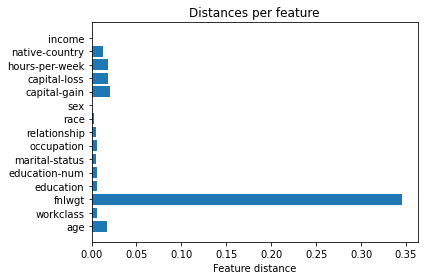

In [12]:
visual.plot_feature_distances(df, df_synth_100)

As we expect, the feature counts in the synthetic data are much closer to the original with a higher level of epsilon.

Notice that fnlwght is a continuous column with many unique values, thus it is unlikely that all of these values are sampled in the synthetic data.

Moreover, we have yet to evaluate the pattern preservation between features, but we do not expect that this particular algorithm will have captured those well.